In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('merged_training_dataset.csv')

In [5]:
df

,patient_id,hotspot_recency_norm,age,hot_spotter_chronic_flag,chronic_x_readmission,hot_spotter_readmission_flag,elderly_flag,num_inpatient_visits,num_follow_ups,inpatient_visit_ratio,...,subtype_COLORECTAL CANCER,subtype_DIABETES,subtype_HYPERTENSION,count_msrmnt_type,care_duration_days,msrmnt_type_diversity,msrmnt_subtype_diversity,days_until_next_care,weighted_care_score,risk_score
0,291,0.805921,56,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
1,306,0.000000,42,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.61
2,310,0.805921,71,0,0,0,0,1.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.70
3,315,0.000000,49,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65
4,318,0.000000,25,0,0,0,0,1.0,1.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82117,0.000000,45,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49
7996,82120,0.000000,12,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19
7997,82130,0.000000,49,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.62
7998,82152,0.000000,54,0,0,0,0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.88


In [6]:
df.columns

Index(['patient_id', 'hotspot_recency_norm', 'age', 'hot_spotter_chronic_flag',
       'chronic_x_readmission', 'hot_spotter_readmission_flag', 'elderly_flag',
       'num_inpatient_visits', 'num_follow_ups', 'inpatient_visit_ratio',
       'num_visits', 'followup_ratio', 'num_er_visits',
       'days_between_first_last_visit', 'er_visit_ratio',
       'visit_frequency_per_month', 'num_chronic_conditions', 'cond_CANCER',
       'has_cancer_history', 'diabetes_count', 'chronic_condition_ratio',
       'cancer_count', 'diabetes_count.1', 'hypertension_count',
       'num_care_events', 'last_care_dt', 'num_care_gaps', 'has_next_care',
       'has_last_care', 'type_MEDICATION ADHERENCE', 'type_SCREENING',
       'subtype_BREAST CANCER', 'subtype_CHOLESTEROL',
       'subtype_COLORECTAL CANCER', 'subtype_DIABETES', 'subtype_HYPERTENSION',
       'count_msrmnt_type', 'care_duration_days', 'msrmnt_type_diversity',
       'msrmnt_subtype_diversity', 'days_until_next_care',
       'weighted_car

✅ Dataset shape: (8000, 43)

🏋️ Training ML Models...

✅ Linear Regression         | R²: 0.4356 | MAE: 0.8493 | MSE: 3.4366
✅ Ridge Regression          | R²: 0.4367 | MAE: 0.8475 | MSE: 3.4300
✅ Lasso Regression          | R²: 0.4412 | MAE: 0.8461 | MSE: 3.4027
✅ Decision Tree             | R²: 0.2575 | MAE: 0.9243 | MSE: 4.5210
✅ Random Forest             | R²: 0.4219 | MAE: 0.8428 | MSE: 3.5202
✅ Extra Trees               | R²: 0.4376 | MAE: 0.8555 | MSE: 3.4244
✅ Gradient Boosting         | R²: 0.3582 | MAE: 0.8371 | MSE: 3.9079
✅ XGBoost                   | R²: 0.4597 | MAE: 0.8123 | MSE: 3.2895
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train s

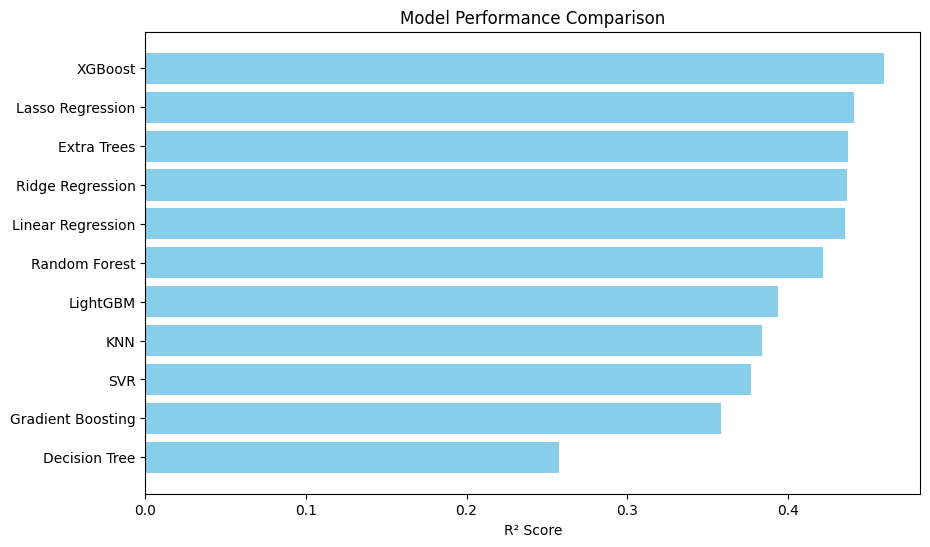

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("merged_dataset.csv")

print(f"Dataset shape: {df.shape}")

df = df.drop_duplicates()

X = df.drop(columns=['risk_score', 'patient_id'])
y = df['risk_score']

X = X.fillna(0)

for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].map({'t': 1, 'f': 0, 'True': 1, 'False': 0}).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=np.number).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

ml_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42, verbosity=0),
    "LightGBM": lgb.LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Gaussian Naive Bayes": GaussianNB()
}

results = []

print("\n🏋️ Training ML Models...\n")

for name, model in ml_models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        results.append((name, r2, mae, mse))
        print(f"{name:<25} | R²: {r2:.4f} | MAE: {mae:.4f} | MSE: {mse:.4f}")

    except Exception as e:
        print(f"{name:<25} failed: {e}")

results_df = pd.DataFrame(results, columns=["Model", "R²", "MAE", "MSE"]).sort_values(by="R²", ascending=False)
print("\n🏆 Model Comparison:\n")
print(results_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['R²'], color='skyblue')
plt.xlabel("R² Score")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()
plt.show()
